# Film Insights And Exploratory Data Analysis.

![](https://images.unsplash.com/photo-1440404653325-ab127d49abc1?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80)

## Overview

This project analyzes movie data to determine the features and approaches that contribute to a movie success. The first step will be to import and clean the data. I will go through all the datasets to primarily understand what they contain and then decide the data to use to answer the business questions for this project. Once the data is cleaned, I will focus to answer the questions below and additional insights drawn from the data:

 1.[Which movie genres are most commonly produced and does quantity equate to higher gross return?](URL)
 
 2.[What is the best time of the year to release a movie?](URL)
 
 3.[Which studios are the top competitors?](URL)
 
 

# Data Understanding

## Import Libraries


In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Import and Clean Data

In [2]:
#read the data into pandas dfs
#box office mojo movie gross file
bom_df=pd.read_csv("zippedData/bom.movie_gross.csv.gz")
#rotten tomatoes movie info
rt_movie_df=pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
#rotten tomatoes reviews
rt_reviews_df=pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding='latin-1')
#The movie db
tmdb_df=pd.read_csv("zippedData/tmdb.movies.csv.gz")
#the numbers movie budgets
tn_df=pd.read_csv("zippedData/tn.movie_budgets.csv.gz")


## bom.movie_gross data

Preview bom.movie_gross to get an initial look of the records

In [3]:
print('bom.movie_gross', '\n')
bom_df.info()

bom.movie_gross 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Clean bom.movie_gross

In [5]:
#Fill missing values for studio column with 'N/A', fill domestic_gross and foreign_gross missing values with median
bom_df['studio'].fillna('N/A', inplace=True)
bom_df['domestic_gross'].fillna(bom_df.domestic_gross.median(), inplace=True)
bom_df['foreign_gross'].fillna(bom_df.domestic_gross.median(), inplace=True)
#Remove comma in foreign_gross
bom_df['foreign_gross'].replace(',', '', regex=True, inplace=True)

#Change foreign_gross to float64
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype('float64')

#Preview info to ensure the changes have reflected
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


## rt.movie_info data

Preview data frame to get an initial look of the records

In [6]:
print('rt.movie_info', '\n')
rt_movie_df.info()

rt.movie_info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [7]:
rt_movie_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Clean the data

In [8]:
#Fill synposis, genre, director, writer, currency, studio, rating missing values with 'N/A'
rt_movie_df['synopsis'].fillna('N/A', inplace=True)
rt_movie_df['genre'].fillna('N/A', inplace=True)
rt_movie_df['director'].fillna('N/A', inplace=True)
rt_movie_df['writer'].fillna('N/A', inplace=True)
rt_movie_df['currency'].fillna('N/A', inplace=True)
rt_movie_df['studio'].fillna('N/A', inplace=True)
rt_movie_df['rating'].fillna('N/A', inplace=True)

#Fill box_office missing values with 0
rt_movie_df['box_office'].fillna(0, inplace=True)

#Fill theater_date and dvd_date missing values with "Jan 0, 0000" to keep same format
rt_movie_df['theater_date'].fillna('Jan 0, 0000', inplace=True)
rt_movie_df['dvd_date'].fillna('Jan 0, 0000', inplace=True)

#Remove 'minutes' from runtime, change data type to float64 and impute missing values with mean
rt_movie_df['runtime'].replace('minutes', '', regex=True, inplace=True)
rt_movie_df['runtime'] = rt_movie_df['runtime'].astype('float64')
rt_movie_df['runtime'].fillna(rt_movie_df.runtime.mean(), inplace=True)

#Check to ensure all changes reflected
rt_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1560 non-null   int64  
 1   synopsis      1560 non-null   object 
 2   rating        1560 non-null   object 
 3   genre         1560 non-null   object 
 4   director      1560 non-null   object 
 5   writer        1560 non-null   object 
 6   theater_date  1560 non-null   object 
 7   dvd_date      1560 non-null   object 
 8   currency      1560 non-null   object 
 9   box_office    1560 non-null   object 
 10  runtime       1560 non-null   float64
 11  studio        1560 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 146.4+ KB


## rt.reviews data

Preview the data

In [9]:
print('rt.reviews', '\n')
rt_reviews_df.info()

rt.reviews 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [10]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


clean the data

In [11]:
#Fill missing values in review, rating, critic, publisher columns with 'N/A'
rt_reviews_df['review'].fillna('N/A', inplace=True)
rt_reviews_df['rating'].fillna('N/A', inplace=True)
rt_reviews_df['critic'].fillna('N/A', inplace=True)
rt_reviews_df['publisher'].fillna('N/A', inplace=True)

#Ensure changes worked
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      54432 non-null  object
 2   rating      54432 non-null  object
 3   fresh       54432 non-null  object
 4   critic      54432 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54432 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


## tmdb.movies data

Preview the data

In [12]:
print('tmdb.movies', '\n')
tmdb_df.info()

tmdb.movies 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [13]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Clean the data

In [14]:
#Drop Unnamed column
tmdb_df.drop(columns=['Unnamed: 0'], inplace=True)

#Change release_date to datetime format
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

#Ensure changes worked
tmdb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.8+ MB


## tn.movie_budgets data

Preview the data

In [15]:
print('tn.movie_budgets', '\n')
tn_df.info()

tn.movie_budgets 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [16]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Clean the data

In [17]:

#Remove dollar sign 

tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '')

#Remove comma
tn_df['production_budget'].replace(',', '', regex=True, inplace=True)
tn_df['domestic_gross'].replace(',', '', regex=True, inplace=True)
tn_df['worldwide_gross'].replace(',', '', regex=True, inplace=True)

#Change production_budget, domestic_gross and worldwide_gross to float64
tn_df['production_budget'] = tn_df['production_budget'].astype('float64')
tn_df['domestic_gross'] = tn_df['domestic_gross'].astype('float64')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].astype('float64')

#Convert release_date to datetime format
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])

#Ensure changes worked
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


## Feature Engineering

Before getting into the analytical bit of the cleaned data,it is important to get a better understanding of a movie's success by calculating its profit and profit margin(%) before diving into the factors that make it a success

Note: domestic gross measures a movie's performance in its home country, while worldwide gross measures its performance globally.

Note:Profit margin is a measure of a movie's profitability, which indicates the percentage of revenue that remains after deducting all the production, marketing, and distribution expenses.

In [18]:
#Create the profit column
tn_df['profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']

#Create the profit_margin column
tn_df['profit_margin'] = (round(tn_df['profit'] / tn_df['worldwide_gross'], 4))*100

# Keep only rows where worldwide_gross is non-zero
tn_df = tn_df[tn_df['worldwide_gross'] != 0]

tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,84.69
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,60.73
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-133.70
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.44
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,75.93


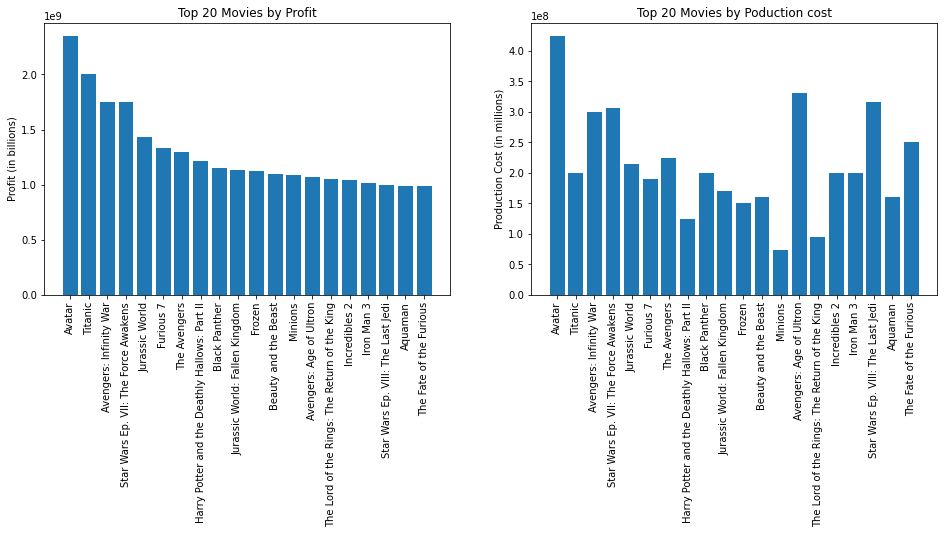

In [19]:
#Sort by profit to see most successful movies
top_20_profit = tn_df.sort_values(by='profit', ascending=False)[:20]


fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(16, 5))

ax1.bar(top_20_profit['movie'], top_20_profit['profit'])
ax2.bar(top_20_profit['movie'], top_20_profit['production_budget'])

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Profit (in billions)")
ax2.set_ylabel("Production Cost (in millions)")
ax1.set_title("Top 20 Movies by Profit")
ax2.set_title("Top 20 Movies by Poduction cost");

Combine the visualizations for insights of profit made per movie

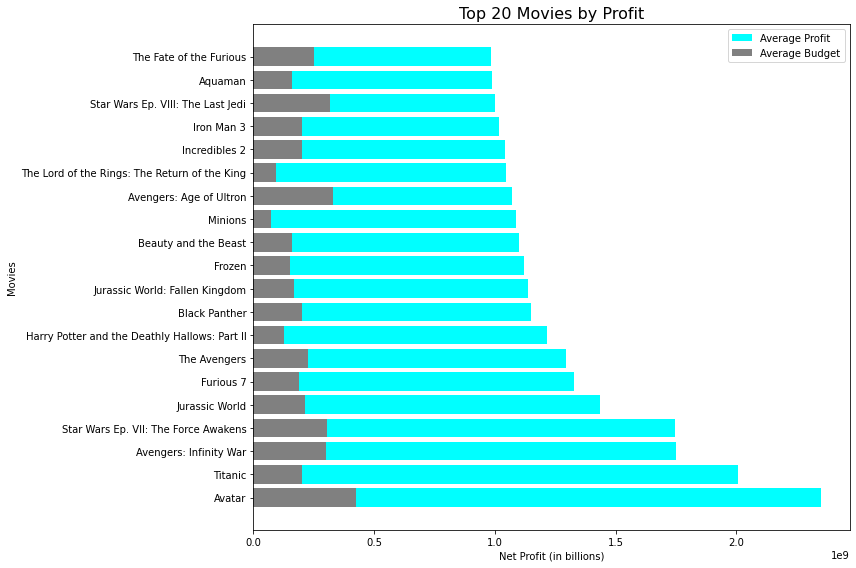

In [20]:

plt.figure(figsize=(12, 8))
#plt.style.use('dark_background')

plt.barh(top_20_profit['movie'], top_20_profit['profit'], label='Average Profit', color='cyan')
plt.barh(top_20_profit['movie'], top_20_profit['production_budget'], label='Average Budget', color='gray')

plt.title('Top 20 Movies by Profit', fontsize=16)
plt.xlabel('Net Profit (in billions)')
plt.ylabel('Movies')
plt.legend()
plt.tight_layout()

plt.show()

# Data Analysis

## Question 1: Which movie genres are most commonly produced and does quantity equate to higher gross return?



In [21]:
#display movie count by genre
#Do a count of top 20 movies grouped by genre.
m_by_genre = rt_movie_df.groupby('genre', as_index=True)['synopsis'].count().sort_values(ascending=False)[:20]
m_by_genre

genre
Drama                                               151
Comedy                                              110
Comedy|Drama                                         80
Drama|Mystery and Suspense                           67
Art House and International|Drama                    62
Action and Adventure|Drama                           42
Action and Adventure|Drama|Mystery and Suspense      40
Drama|Romance                                        35
Comedy|Romance                                       32
Horror                                               31
Art House and International|Comedy|Drama             31
Action and Adventure|Science Fiction and Fantasy     24
Comedy|Drama|Romance                                 23
Classics|Drama                                       21
Action and Adventure|Mystery and Suspense            20
Action and Adventure                                 19
Classics|Drama|Mystery and Suspense                  18
Horror|Mystery and Suspense               

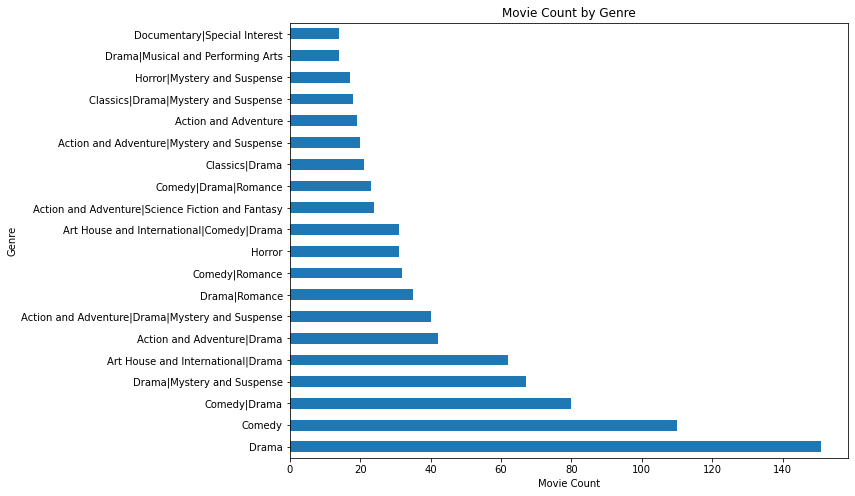

In [22]:
# Display the data as a horizontal bar plot
fig, ax = plt.subplots(figsize=(10,8))
m_by_genre.plot(kind='barh', ax=ax)
ax.set_xlabel('Movie Count')
ax.set_ylabel('Genre')
ax.set_title('Movie Count by Genre')
plt.savefig('MovieCountbyGenre')
plt.show()

We can see that drama, comedy, and Action dominate the quantity of movie genres but does this necessarily mean these are the most profitable genres? In order to determine this we will once again group each genre but this time we are going to take a look at the average box office  for each.

In [23]:
# Replace "N/A" with NaN in the box_office column
rt_movie_df['box_office'] = rt_movie_df['box_office'].replace('N/A', np.nan)

# Drop missing values in the box_office column
rt_movie_df = rt_movie_df.dropna(subset=['box_office'])
rt_movie_df = rt_movie_df[rt_movie_df['box_office'] != 0] #only display box office values greater than 0
rt_movie_df['box_office'].replace(',', '', regex=True, inplace=True) # remove the extraneous comma
rt_movie_df['box_office'] = rt_movie_df['box_office'].astype('float64') #convert box office from object to float data type


# Group the box office median by genre
median_box_office_by_genre = rt_movie_df.groupby('genre')['box_office'].median().sort_values(ascending=False)[:20]

median_box_office_by_genre

genre
Kids and Family|Science Fiction and Fantasy                                    261835892.0
Science Fiction and Fantasy                                                    190871149.0
Action and Adventure|Science Fiction and Fantasy                               154485963.0
Action and Adventure|Drama|Science Fiction and Fantasy                         139111161.5
Drama|Horror|Mystery and Suspense|Romance                                      128579698.0
Comedy|Kids and Family|Romance                                                 127706877.0
Drama|Science Fiction and Fantasy|Romance                                      127490802.0
Action and Adventure|Animation|Kids and Family                                 123188232.0
Action and Adventure|Drama|Mystery and Suspense|Science Fiction and Fantasy    119000000.0
Action and Adventure|Animation|Comedy                                          114053579.0
Action and Adventure|Animation|Comedy|Drama|Kids and Family                    10660

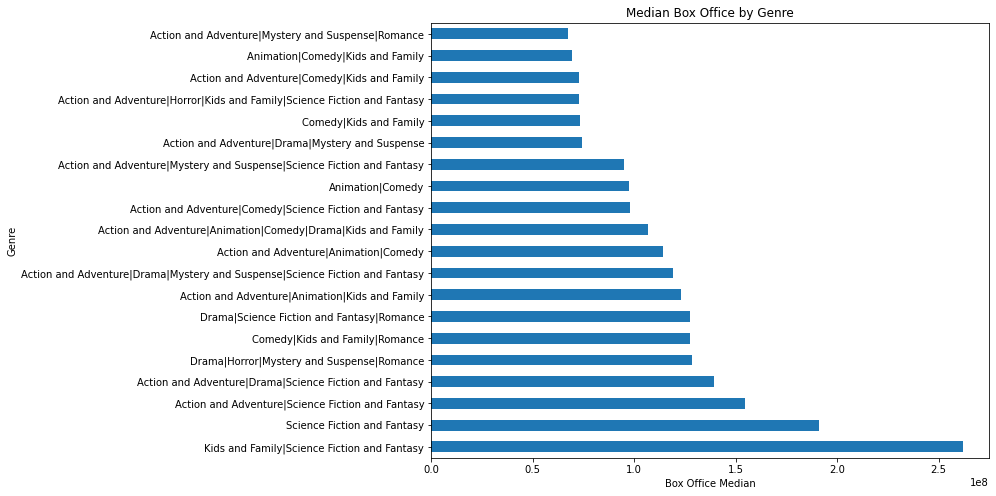

In [24]:
# Display the data as a horizontal bar plot
fig, ax = plt.subplots(figsize=(10,8))
median_box_office_by_genre.plot(kind='barh', ax=ax)
ax.set_xlabel('Box Office Median')
ax.set_ylabel('Genre')
ax.set_title('Median Box Office by Genre')
plt.savefig('MedianboxofficebyGenre')
plt.show()


Interesting, although they are not the most commonly released genres; animation, adventure, and sci-fi typically have the most success in terms of median box office return. We can also see that Animation has a desirable profit margin along with horror. 


**Question 1 Answer**: I recommend focusing efforts on the top 6 most profitable movie genres: **Adventure, Action, Comedy, Drama, Sci-Fi and Animation**. A further recommendation to focus on Fantasy, Sci-Fi and Animation due to less competition and a higher opportunity to profit.

## Question 2: What is the best time of the year to release a movie?

I first determined the months that see the most movie releases

In [25]:
#Add a new column called month, displaying only the month from the release date.
# extract month name from release date column which is altrady in datattime data type
tn_df['month'] = tn_df['release_date'].dt.month_name()

#Count the total number of movies in each month.
movies_per_month = tn_df.groupby('month').size()
#reorder the rows in order
movies_per_month = movies_per_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])  # Reorder the rows to match the desired order
movies_per_month


month
January      328
February     370
March        440
April        433
May          393
June         459
July         424
August       473
September    466
October      542
November     466
December     621
dtype: int64

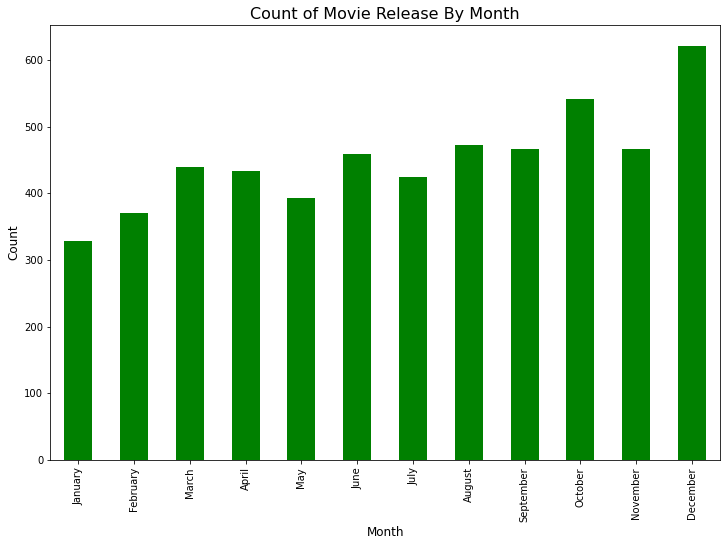

In [26]:
#plot bar
ax = movies_per_month.plot(kind='bar', color='green', figsize=(12, 8))  # Create the bar plot
ax.set_xlabel('Month', fontsize=12)  # Set the x-axis label and font size
ax.set_ylabel('Count', fontsize=12)  # Set the y-axis label and font size
ax.set_title('Count of Movie Release By Month', fontsize=16)  # Set the plot title and font size
plt.savefig('CountbyMonth')  # Save the plot to a file


Largest number of movie releases tend to happen in October and November as indicated. Next we look at the average net income for each movie to ascertain the level of profitability.

In [27]:
tn_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'profit', 'profit_margin', 'month'],
      dtype='object')

In [28]:
#group the movies by month, showing the average profit and profit margin % for each.
profit_per_month=tn_df.groupby(['month'])[['profit', 'profit_margin']].median()
profit_per_month = profit_per_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])  # Reorder the rows to match the desired order
profit_per_month

,profit,profit_margin
month,,
January,6729892.0,40.580
February,12955380.0,47.390
March,11922219.0,41.875
April,6433427.0,33.700
May,15796145.0,55.130
June,25282732.0,57.270
July,24261283.5,58.150
August,8471229.0,44.280
September,3639242.0,28.355


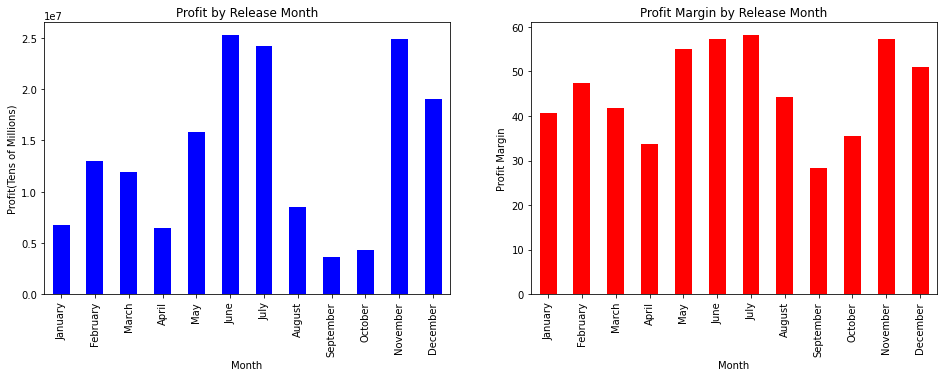

In [29]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# plot bar graph for profit values
profit_per_month['profit'].plot(kind='bar', color='blue', ax=ax1)
ax1.set_ylabel('Profit(Tens of Millions)')
ax1.set_xlabel('Month')
ax1.set_title('Profit by Release Month')

# plot bar graph for profit margin values
profit_per_month['profit_margin'].plot(kind='bar', color='red', ax=ax2)
ax2.set_ylabel('Profit Margin')
ax2.set_xlabel('Month')
ax2.set_title('Profit Margin by Release Month')
plt.savefig('profitandprofitmarginbymonth')


# show the plot
plt.show()

**May, June, July November and December** shoot to the top in terms of both median profit and profit mergin. This is perhaps as a result children and their parents during school breaks and christmas holidays.

**Question 2 Answer**: I recommend releasing the bulk of movies during the months of May, June, July, November and December.

## Question 3: Which studios are the top competitors?

To answer this, We need to merge the tn.movie_budgets and bom.movie_gross data frames.

In [30]:
#Combine movie_budgets_df and movie_gross_df on movie titles
studios_df = tn_df.merge(bom_df, left_on='movie', right_on='title', how='inner')

#Drop rows with studio = 'N/A'
studios_df = studios_df[studios_df['studio'] != 'N/A']

studios_df

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,profit,profit_margin,month,title,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,60.73,May,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.44,May,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.35,April,Avengers: Infinity War,BV,678800000.0,1369.5,2018
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,54.26,November,Justice League,WB,229000000.0,428900000.0,2017
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,5.796209e+08,65.89,November,Spectre,Sony,200100000.0,680600000.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,68,2012-04-27,Sound of My Voice,135000.0,408015.0,4.294480e+05,2.944480e+05,68.56,April,Sound of My Voice,FoxS,408000.0,1400000.0,2012
1239,73,2012-06-15,Your Sister's Sister,120000.0,1597486.0,3.090593e+06,2.970593e+06,96.12,June,Your Sister's Sister,IFC,1600000.0,1400000.0,2012
1240,80,2015-07-10,The Gallows,100000.0,22764410.0,4.165647e+07,4.155647e+07,99.76,July,The Gallows,WB (NL),22800000.0,20200000.0,2015
1241,86,2017-07-07,A Ghost Story,100000.0,1594798.0,2.769782e+06,2.669782e+06,96.39,July,A Ghost Story,A24,1600000.0,1400000.0,2017


Next step is to identify the top 20 studios with the most movie productions in the range of period in our dataframe(1984-2018)

In [31]:
# create a separate df grouped by studio and the total movies
#create a total movies column
studio_movie_count = studios_df.groupby('studio').size().reset_index(name='total_movies')
studio_movie_count = studio_movie_count.sort_values(by='total_movies', ascending=False)[:20]
studio_movie_count

,studio,total_movies
90,Uni.,117
32,Fox,110
94,WB,102
82,Sony,74
69,Par.,74
15,BV,72
48,LGF,61
33,FoxS,46
97,Wein.,41
31,Focus,39


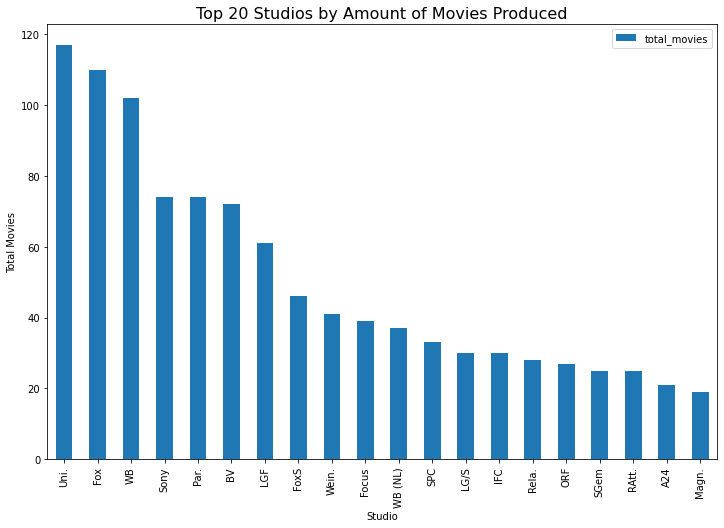

<Figure size 432x288 with 0 Axes>

In [32]:
# plot the resulting dataframe in a bar graph
ax = studio_movie_count.plot.bar(x='studio', y='total_movies', rot=90, figsize=(12, 8))

# set the x-axis and y-axis labels
ax.set_xlabel('Studio')
ax.set_ylabel('Total Movies')

# set the title of the graph
ax.set_title('Top 20 Studios by Amount of Movies Produced', fontsize=16)

# show the graph
plt.show()
plt.savefig('Top20StudiosbyMovies Produced')

**Universal, Fox, and Warner Brothers** are the top three studios with over 100 movies each. Based on the amount of movies made, they could be potential competitors. Since net profit is the defining factor of a success, let's take a look at average net profit per studio.

Next step is to identify the top 20 studios with the highest average profit in the range of period in our dataframe(1984-2018)

In [33]:
# group the dataframe by studio and compute the mean of profits
#create an average profit column
studio_avg_profit = studios_df.groupby('studio')['profit'].mean().reset_index(name='avg_profit')
studio_avg_profit = studio_avg_profit.sort_values(by='avg_profit', ascending=False)[:20]
studio_avg_profit

,studio,avg_profit
64,P/DW,3.744028e+08
15,BV,3.310447e+08
38,GrtIndia,2.335029e+08
90,Uni.,1.771931e+08
32,Fox,1.730938e+08
95,WB (NL),1.727639e+08
82,Sony,1.696123e+08
94,WB,1.372168e+08
69,Par.,1.306514e+08
83,Strand,1.292782e+08


In [34]:
studio_avg_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 64 to 97
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   studio      20 non-null     object 
 1   avg_profit  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


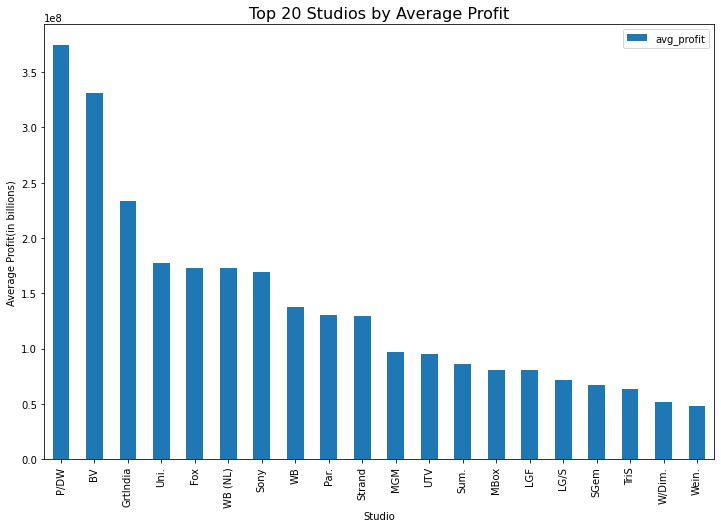

<Figure size 432x288 with 0 Axes>

In [35]:
# plot the resulting dataframe in a bar graph
ax = studio_avg_profit.plot.bar(x='studio', y='avg_profit', rot=90, figsize=(12, 8))

# set the x-axis and y-axis labels
ax.set_xlabel('Studio')
ax.set_ylabel('Average Profit(in billions)')

# set the title of the graph
ax.set_title('Top 20 Studios by Average Profit', fontsize=16)

# show the graph
plt.show()
plt.savefig('Top20Studiosbyprofit')

**Question 3 Answer**: The plots above clearly shows top 20 competitors in the movie industry based on average profit. These are the studios that we should look to compete against.

# Conclusion

In the brief analysis above, we looked at who our top competitors would be based on the amount of movies made and the average net profit of each studio, we determined which the best time of year to bulk release movies, and finally looked at which genres have had the highest average net profit. There are many more factors involved in making movies that we could dive into, but this gives us answers to some foundational questions for creating a successful movie.

## Recommendations

1. I recommend that Microsoft should focus their efforts on the top 6 most profitable movie genres: Adventure, Action, Comedy, Drama, Sci-Fi and Animation. A further recommendation to focus on Sci-Fi and Animation due to less competition and a higher opportunity to profit.

2. I recommend that Microsoft release the bulk of their movies,during the months of May, June, July, November and December

3. Microsoft should research the top competitor's best practices and try to build off the success of these well established studios such as Universal, Fox and warner brothers who not only in the quantity but also quality of movies bases on profit analysis.

## Future Work

As next steps, I would suggest the following:

1. With the ever increaing inflation cost, conduct furrther analysis to adjust using Consumer Price Index
3. Conduct further analysis on how to allocate the production budget, minimizing it but effectively. A more detailed financial analysis to say the least.
4. A further analysis on the production team, when it comes to hiring the creative team such as directors, photographers, cinematographers and script writers.
5. Analysis of additional revenue streams e.g. merchandise. sequels and licencing.

